In [1]:
##Importamos bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
#Leemos y combinamos datos de entrenamiento y prueba
path = "../data/"
train = pd.read_csv(path+"train.csv").drop("Id",axis=1)
test = pd.read_csv(path+"test.csv").drop("Id",axis=1)
sub = pd.read_csv(path+"sample_submission.csv")

def con_cat(train, test):
    df1, df2 = train.copy(), test.copy()
    df1["group"] = "train"
    df2["group"] = "test"
    
    return pd.concat([df1, df2], axis=0, ignore_index=True)

df = con_cat(train, test)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000,train
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000,train
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000,train
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000,train
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000,train


In [4]:
##Separamos variables categóricas y numéricas

categorical_cols = [col for col in df.select_dtypes(include='object').columns
                    if df[col].nunique() < 4]

cardinal_cols = [col for col in df.select_dtypes(include='object').columns
                 if df[col].nunique() >= 4]

cat_cols = [col for col in df.select_dtypes(include='object').columns]

numerical_col = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
                 if col != "SalePrice" and df[col].nunique() > 1]

num_but_car = [col for col in df.select_dtypes(include=['float', 'int']).columns
               if df[col].nunique() < 4 and col != "SalePrice"]

total_Cat = cardinal_cols + categorical_cols
total_Num = num_but_car + numerical_col
other = [col for col in df.columns if col not in total_Cat + total_Num]

print("Categóricas:", len(total_Cat), total_Cat)
print("Numéricas:", len(total_Num), total_Num)
print("Otras variables:", len(other), other)

Categóricas: 44 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Street', 'Alley', 'Utilities', 'LandSlope', 'MasVnrType', 'CentralAir', 'GarageFinish', 'PavedDrive', 'PoolQC', 'group']
Numéricas: 38 ['BsmtHalfBath', 'HalfBath', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt

Categorical values: MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Categorical ratio: MSZoning
RL        0.776
RM        0.158
FV        0.048
RH        0.009
C (all)   0.009
Name: count, dtype: float64


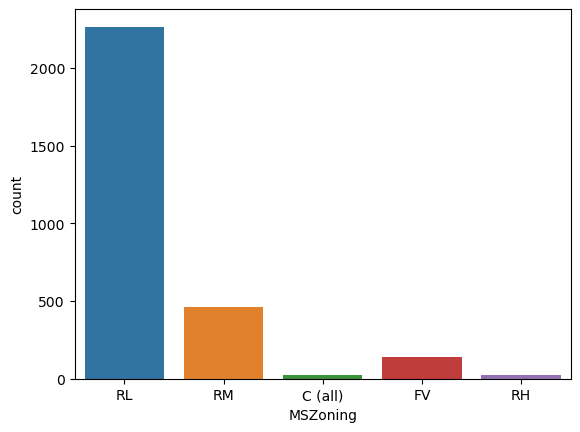

Categorical values: LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64
Categorical ratio: LotShape
Reg   0.637
IR1   0.332
IR2   0.026
IR3   0.005
Name: count, dtype: float64


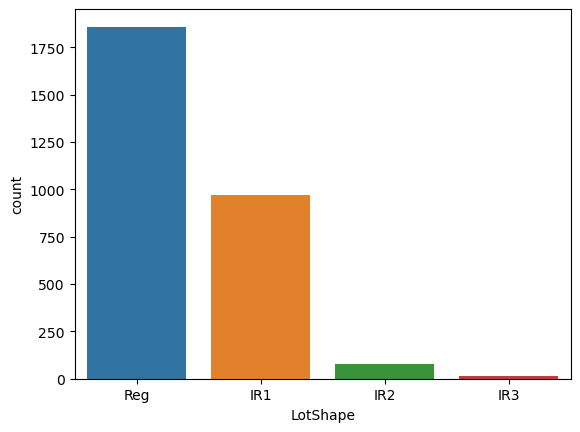

Categorical values: LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
Categorical ratio: LandContour
Lvl   0.898
HLS   0.041
Bnk   0.040
Low   0.021
Name: count, dtype: float64


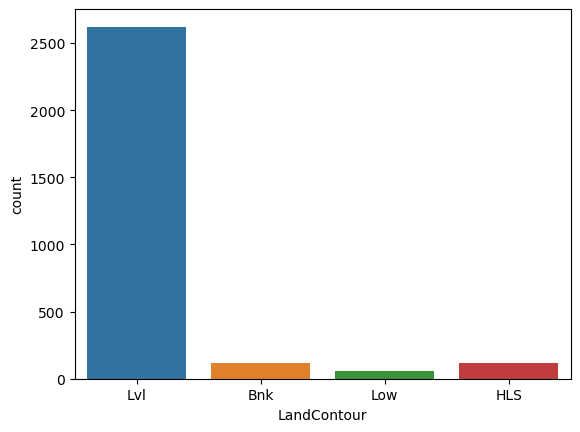

Categorical values: LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
Categorical ratio: LotConfig
Inside    0.731
Corner    0.175
CulDSac   0.060
FR2       0.029
FR3       0.005
Name: count, dtype: float64


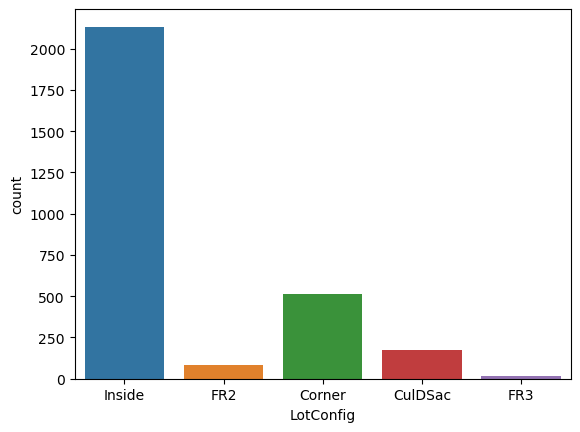

Categorical values: Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64
Categorical ratio: Neighborhood
NAmes     0.152
CollgCr   0.091
OldTown   0.082
Edwards   0.066
Somerst   0.062
NridgHt   0.057
Gilbert   0.057
Sawyer    0.052
NWAmes    0.045
SawyerW   0.043
Mitchel   0.039
BrkSide   0.037
Crawfor   0.035
IDOTRR    0.032
Timber    0.025
NoRidge   0.024
StoneBr   0.017
SWISU     0.016
ClearCr   0.015
MeadowV   0.013
BrDale    0.010
Blmngtn   0.010
Veenker   0.008
NPkVill   0.008
Blueste   0.003
Name: count, dtype: float64


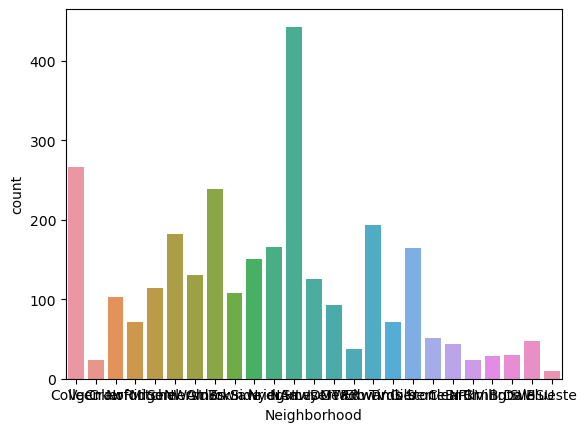

Categorical values: Condition1
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64
Categorical ratio: Condition1
Norm     0.860
Feedr    0.056
Artery   0.032
RRAn     0.017
PosN     0.013
RRAe     0.010
PosA     0.007
RRNn     0.003
RRNe     0.002
Name: count, dtype: float64


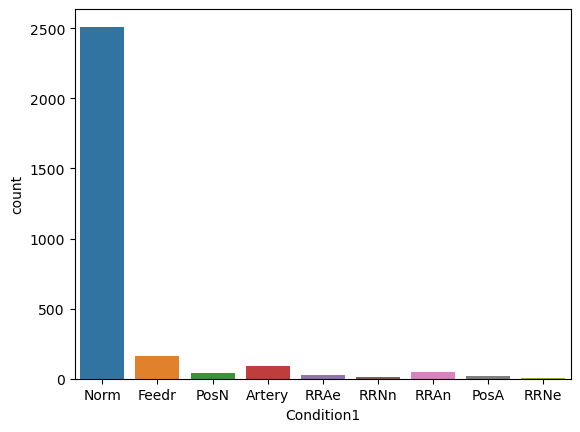

Categorical values: Condition2
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: count, dtype: int64
Categorical ratio: Condition2
Norm     0.990
Feedr    0.004
Artery   0.002
PosN     0.001
PosA     0.001
RRNn     0.001
RRAn     0.000
RRAe     0.000
Name: count, dtype: float64


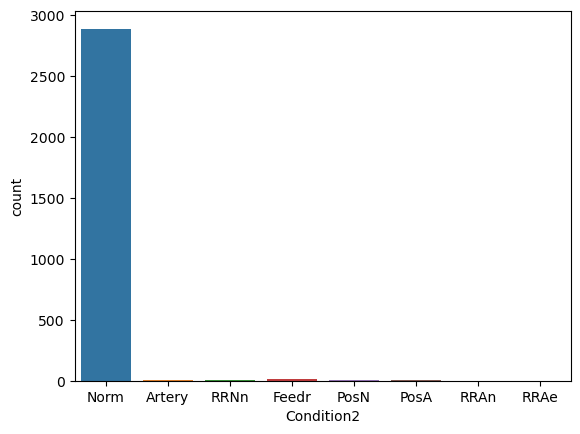

Categorical values: BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64
Categorical ratio: BldgType
1Fam     0.831
TwnhsE   0.078
Duplex   0.037
Twnhs    0.033
2fmCon   0.021
Name: count, dtype: float64


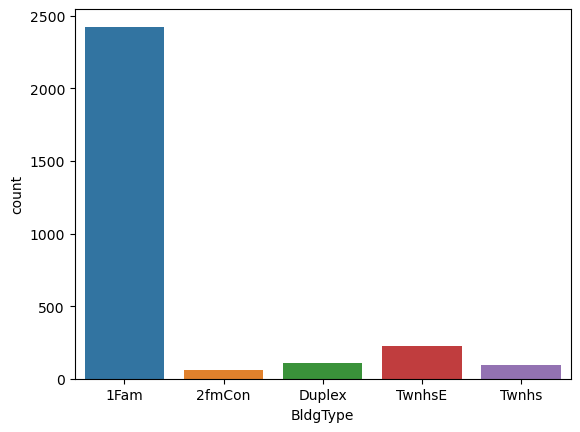

Categorical values: HouseStyle
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64
Categorical ratio: HouseStyle
1Story   0.504
2Story   0.299
1.5Fin   0.108
SLvl     0.044
SFoyer   0.028
2.5Unf   0.008
1.5Unf   0.007
2.5Fin   0.003
Name: count, dtype: float64


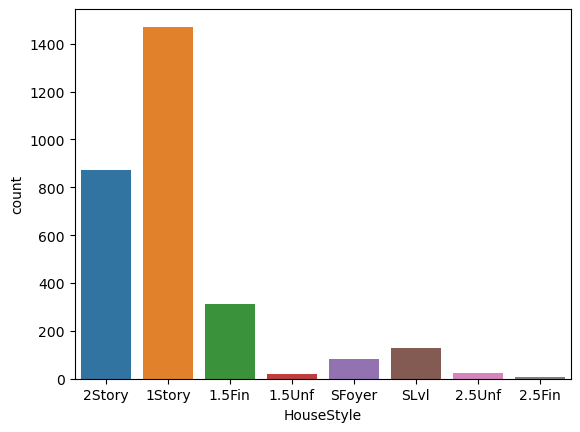

Categorical values: RoofStyle
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64
Categorical ratio: RoofStyle
Gable     0.791
Hip       0.189
Gambrel   0.008
Flat      0.007
Mansard   0.004
Shed      0.002
Name: count, dtype: float64


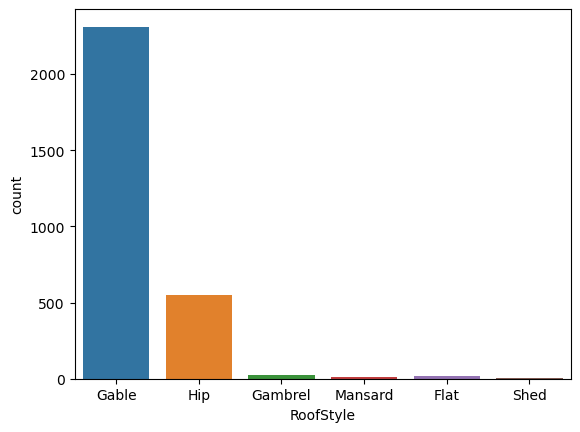

Categorical values: RoofMatl
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
Categorical ratio: RoofMatl
CompShg   0.985
Tar&Grv   0.008
WdShake   0.003
WdShngl   0.002
Metal     0.000
Membran   0.000
Roll      0.000
ClyTile   0.000
Name: count, dtype: float64


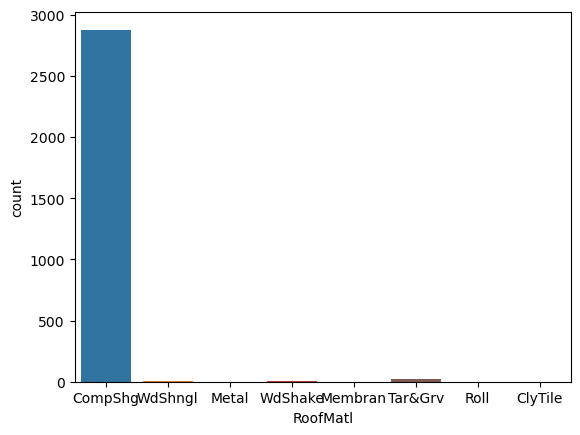

Categorical values: Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
Categorical ratio: Exterior1st
VinylSd   0.351
MetalSd   0.154
HdBoard   0.151
Wd Sdng   0.141
Plywood   0.076
CemntBd   0.043
BrkFace   0.030
WdShing   0.019
AsbShng   0.015
Stucco    0.015
BrkComm   0.002
AsphShn   0.001
Stone     0.001
CBlock    0.001
ImStucc   0.000
Name: count, dtype: float64


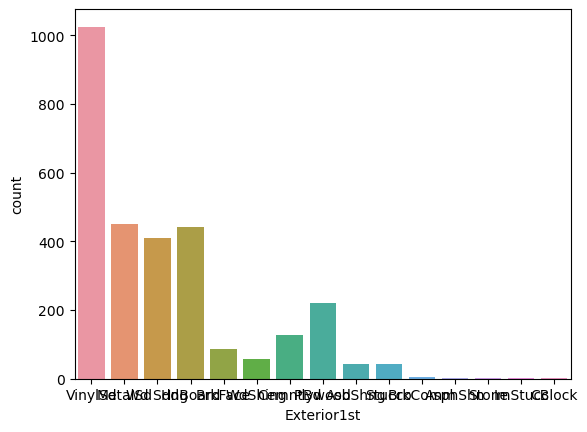

Categorical values: Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64
Categorical ratio: Exterior2nd
VinylSd   0.347
MetalSd   0.153
HdBoard   0.139
Wd Sdng   0.134
Plywood   0.092
CmentBd   0.043
Wd Shng   0.028
BrkFace   0.016
Stucco    0.016
AsbShng   0.013
Brk Cmn   0.008
ImStucc   0.005
Stone     0.002
AsphShn   0.001
CBlock    0.001
Other     0.000
Name: count, dtype: float64


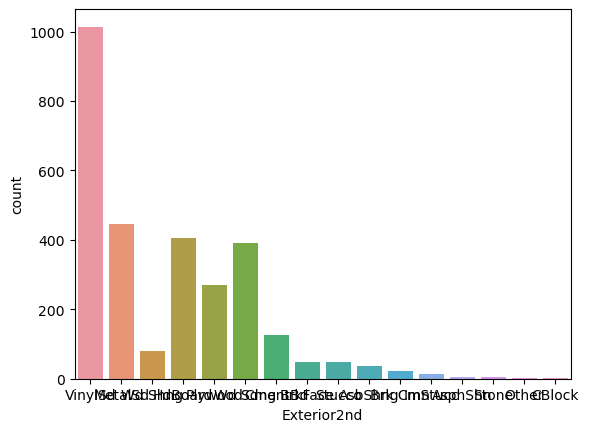

Categorical values: ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64
Categorical ratio: ExterQual
TA   0.616
Gd   0.335
Ex   0.037
Fa   0.012
Name: count, dtype: float64


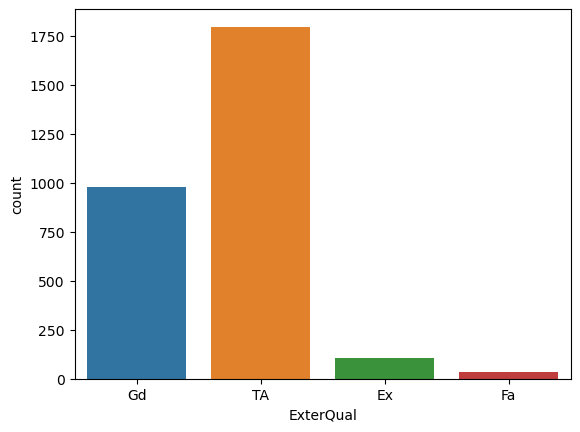

Categorical values: ExterCond
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64
Categorical ratio: ExterCond
TA   0.869
Gd   0.102
Fa   0.023
Ex   0.004
Po   0.001
Name: count, dtype: float64


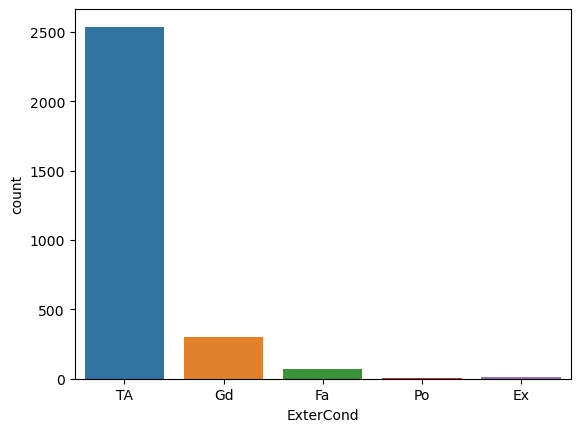

Categorical values: Foundation
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64
Categorical ratio: Foundation
PConc    0.448
CBlock   0.423
BrkTil   0.107
Slab     0.017
Stone    0.004
Wood     0.002
Name: count, dtype: float64


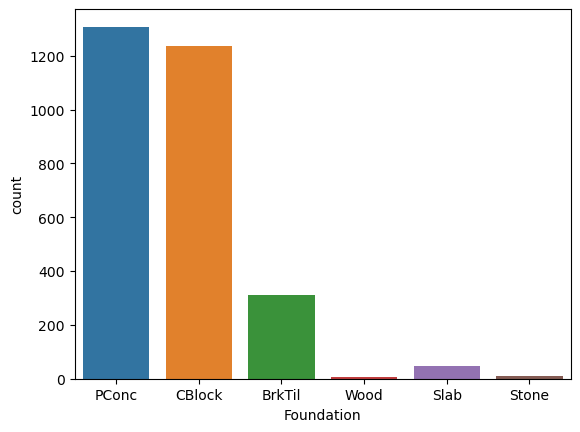

Categorical values: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Categorical ratio: BsmtQual
TA   0.440
Gd   0.414
Ex   0.088
Fa   0.030
Name: count, dtype: float64


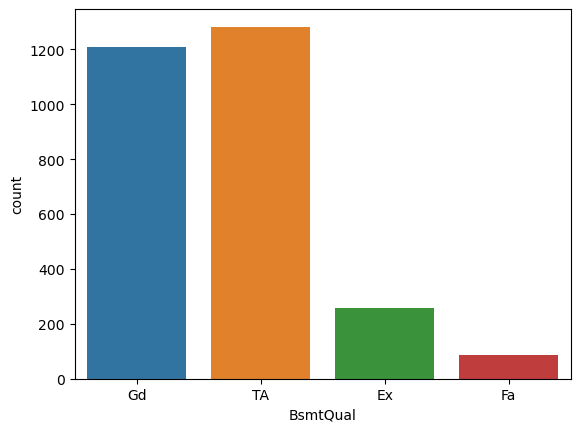

Categorical values: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Categorical ratio: BsmtCond
TA   0.893
Gd   0.042
Fa   0.036
Po   0.002
Name: count, dtype: float64


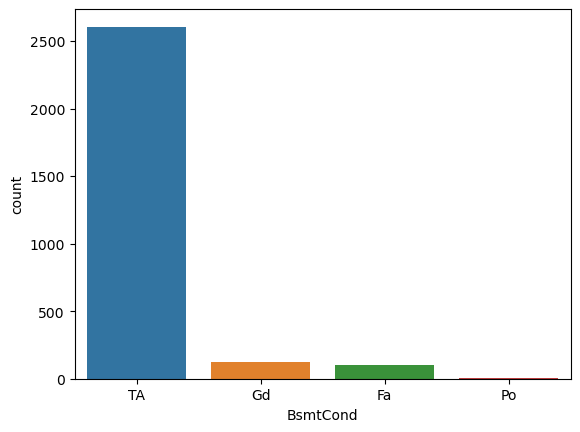

Categorical values: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Categorical ratio: BsmtExposure
No   0.652
Av   0.143
Gd   0.095
Mn   0.082
Name: count, dtype: float64


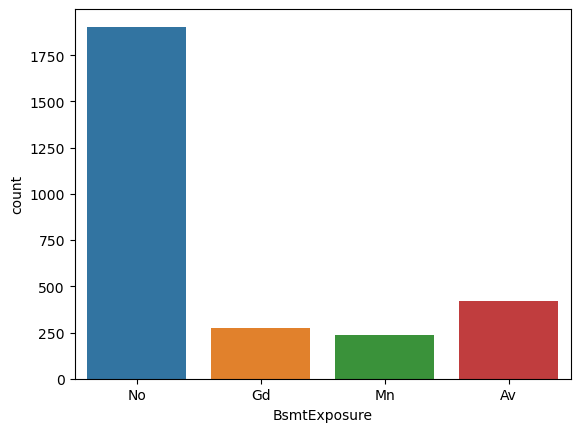

Categorical values: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Categorical ratio: BsmtFinType1
Unf   0.292
GLQ   0.291
ALQ   0.147
Rec   0.099
BLQ   0.092
LwQ   0.053
Name: count, dtype: float64


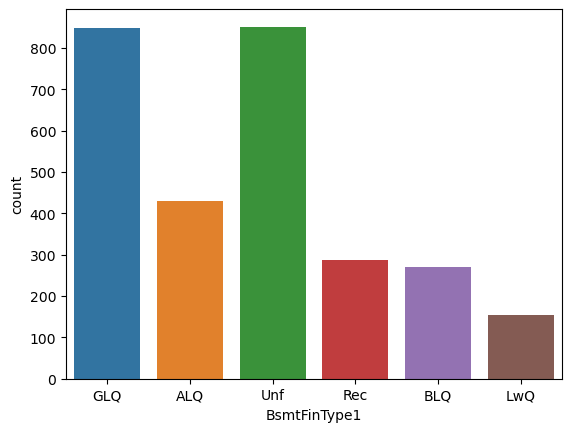

Categorical values: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64
Categorical ratio: BsmtFinType2
Unf   0.854
Rec   0.036
LwQ   0.030
BLQ   0.023
ALQ   0.018
GLQ   0.012
Name: count, dtype: float64


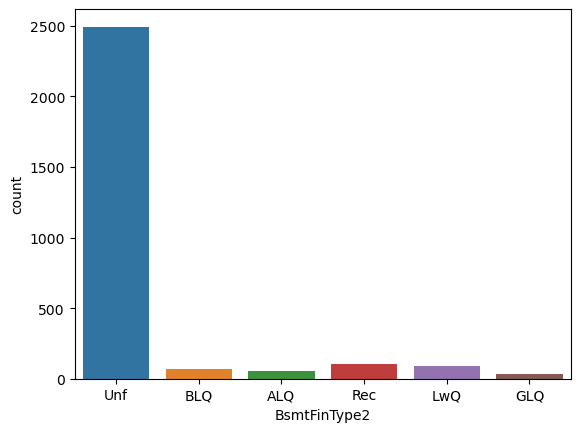

Categorical values: Heating
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64
Categorical ratio: Heating
GasA    0.985
GasW    0.009
Grav    0.003
Wall    0.002
OthW    0.001
Floor   0.000
Name: count, dtype: float64


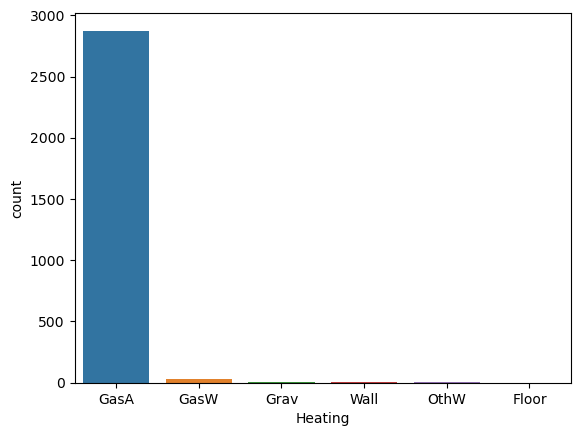

Categorical values: HeatingQC
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: count, dtype: int64
Categorical ratio: HeatingQC
Ex   0.511
TA   0.294
Gd   0.162
Fa   0.032
Po   0.001
Name: count, dtype: float64


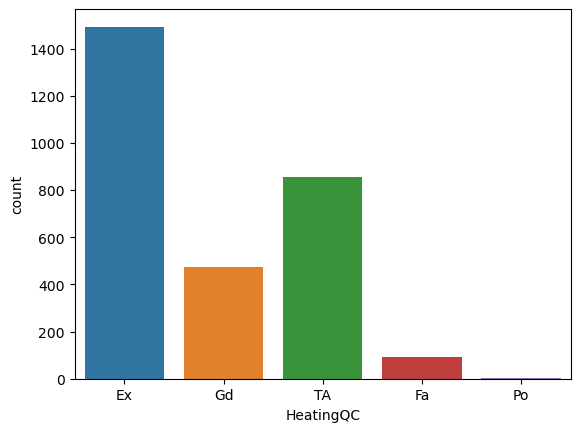

Categorical values: Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64
Categorical ratio: Electrical
SBrkr   0.915
FuseA   0.064
FuseF   0.017
FuseP   0.003
Mix     0.000
Name: count, dtype: float64


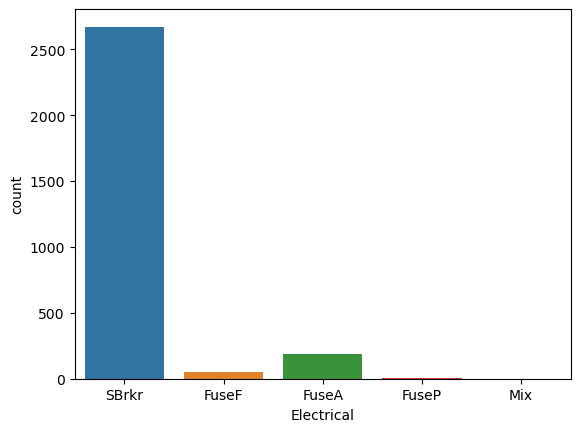

Categorical values: KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64
Categorical ratio: KitchenQual
TA   0.511
Gd   0.394
Ex   0.070
Fa   0.024
Name: count, dtype: float64


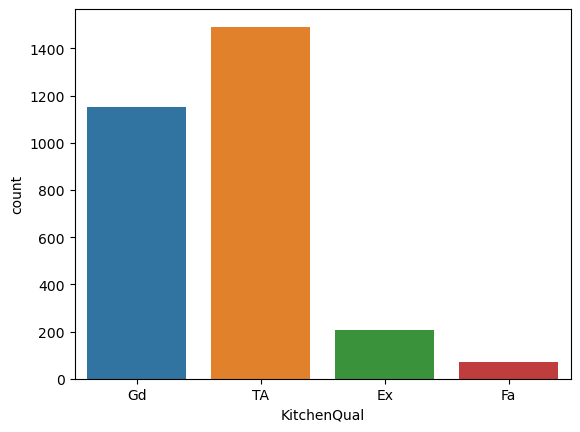

Categorical values: Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64
Categorical ratio: Functional
Typ    0.931
Min2   0.024
Min1   0.022
Mod    0.012
Maj1   0.007
Maj2   0.003
Sev    0.001
Name: count, dtype: float64


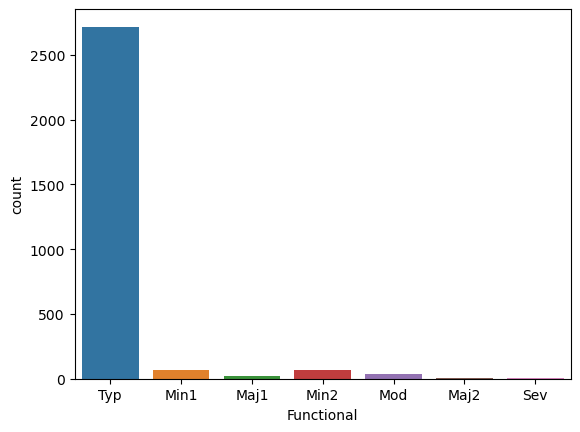

Categorical values: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Categorical ratio: FireplaceQu
Gd   0.255
TA   0.203
Fa   0.025
Po   0.016
Ex   0.015
Name: count, dtype: float64


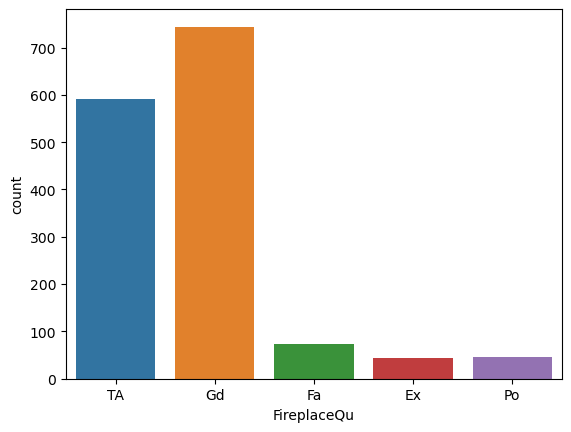

Categorical values: GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
Categorical ratio: GarageType
Attchd    0.590
Detchd    0.267
BuiltIn   0.064
Basment   0.012
2Types    0.008
CarPort   0.005
Name: count, dtype: float64


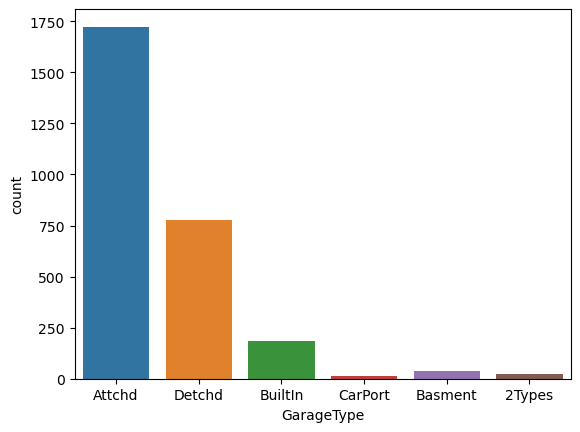

Categorical values: GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
Categorical ratio: GarageQual
TA   0.892
Fa   0.042
Gd   0.008
Po   0.002
Ex   0.001
Name: count, dtype: float64


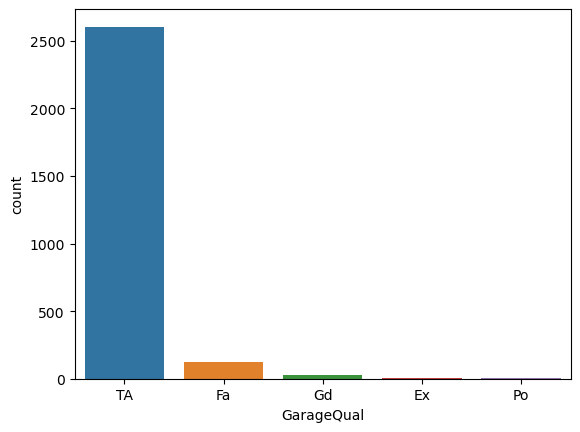

Categorical values: GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64
Categorical ratio: GarageCond
TA   0.909
Fa   0.025
Gd   0.005
Po   0.005
Ex   0.001
Name: count, dtype: float64


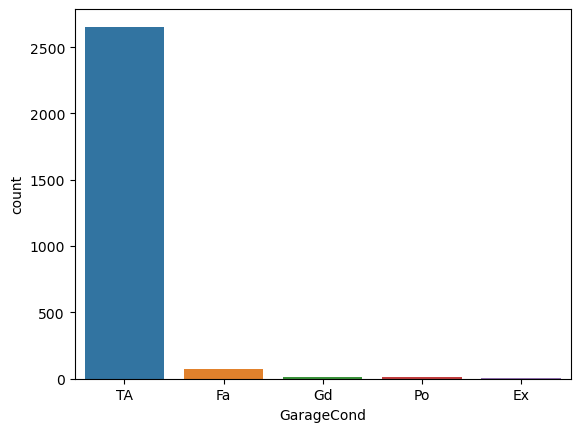

Categorical values: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Categorical ratio: Fence
MnPrv   0.113
GdPrv   0.040
GdWo    0.038
MnWw    0.004
Name: count, dtype: float64


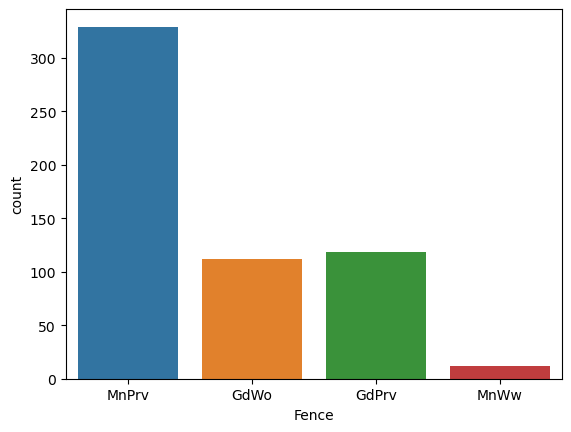

Categorical values: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
Categorical ratio: MiscFeature
Shed   0.033
Gar2   0.002
Othr   0.001
TenC   0.000
Name: count, dtype: float64


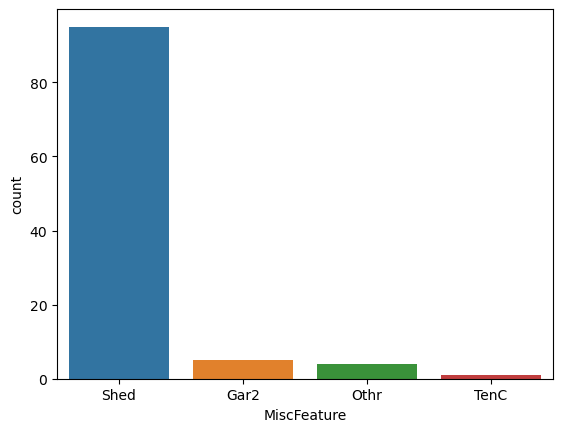

Categorical values: SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64
Categorical ratio: SaleType
WD      0.865
New     0.082
COD     0.030
ConLD   0.009
CWD     0.004
ConLI   0.003
ConLw   0.003
Oth     0.002
Con     0.002
Name: count, dtype: float64


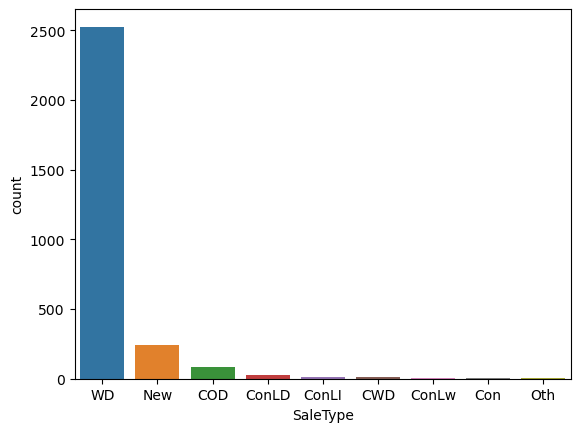

Categorical values: SaleCondition
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64
Categorical ratio: SaleCondition
Normal    0.823
Partial   0.084
Abnorml   0.065
Family    0.016
Alloca    0.008
AdjLand   0.004
Name: count, dtype: float64


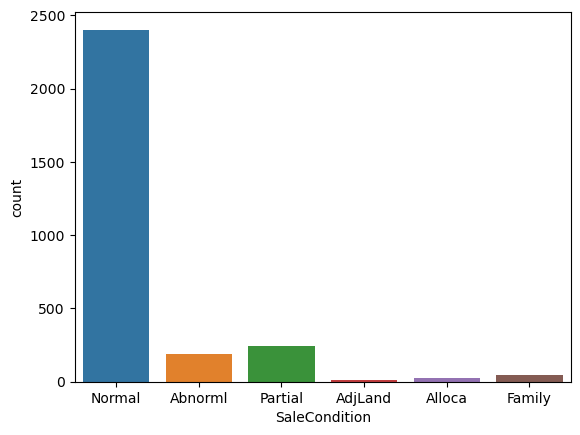

Categorical values: Street
Pave    2907
Grvl      12
Name: count, dtype: int64
Categorical ratio: Street
Pave   0.996
Grvl   0.004
Name: count, dtype: float64


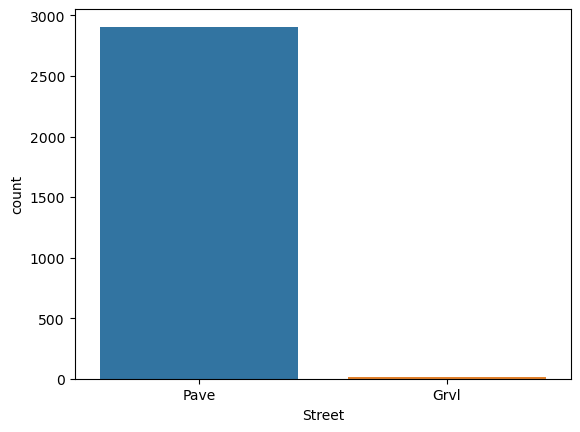

Categorical values: Alley
Grvl    120
Pave     78
Name: count, dtype: int64
Categorical ratio: Alley
Grvl   0.041
Pave   0.027
Name: count, dtype: float64


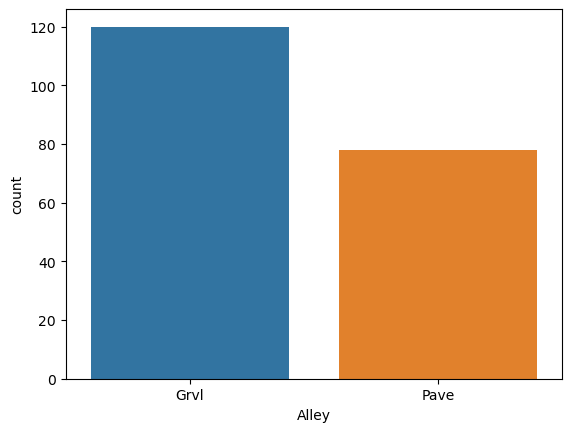

Categorical values: Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
Categorical ratio: Utilities
AllPub   0.999
NoSeWa   0.000
Name: count, dtype: float64


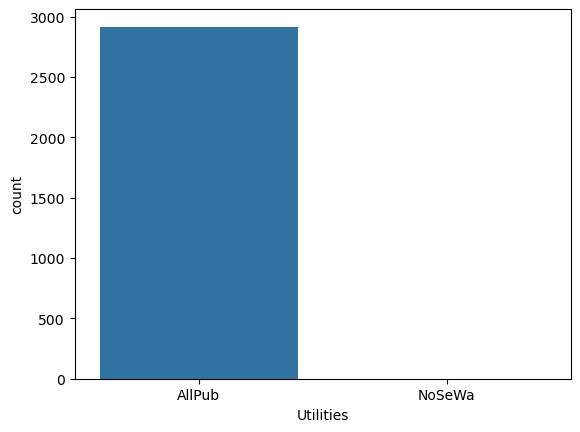

Categorical values: LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64
Categorical ratio: LandSlope
Gtl   0.952
Mod   0.043
Sev   0.005
Name: count, dtype: float64


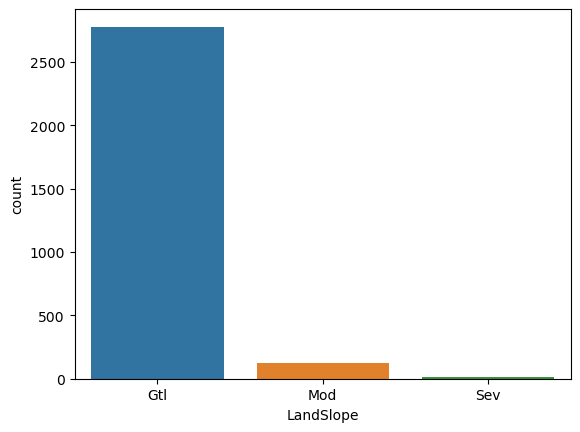

Categorical values: MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64
Categorical ratio: MasVnrType
BrkFace   0.301
Stone     0.085
BrkCmn    0.009
Name: count, dtype: float64


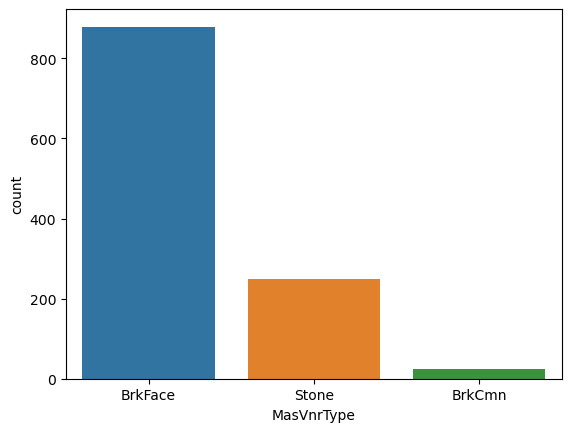

Categorical values: CentralAir
Y    2723
N     196
Name: count, dtype: int64
Categorical ratio: CentralAir
Y   0.933
N   0.067
Name: count, dtype: float64


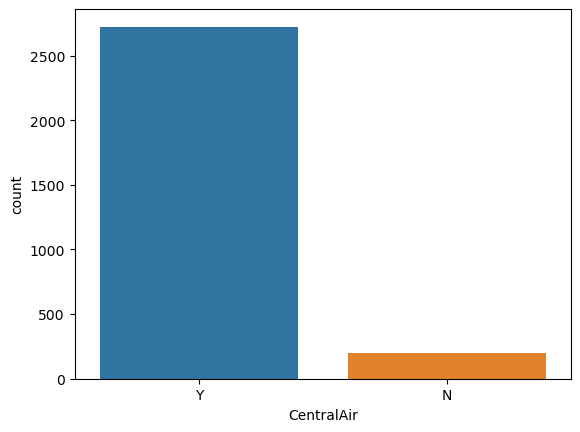

Categorical values: GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64
Categorical ratio: GarageFinish
Unf   0.421
RFn   0.278
Fin   0.246
Name: count, dtype: float64


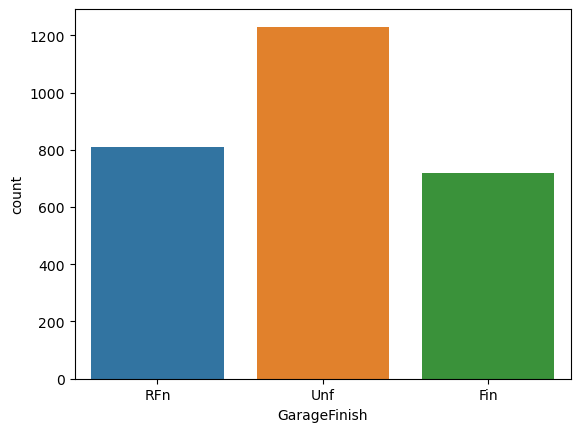

Categorical values: PavedDrive
Y    2641
N     216
P      62
Name: count, dtype: int64
Categorical ratio: PavedDrive
Y   0.905
N   0.074
P   0.021
Name: count, dtype: float64


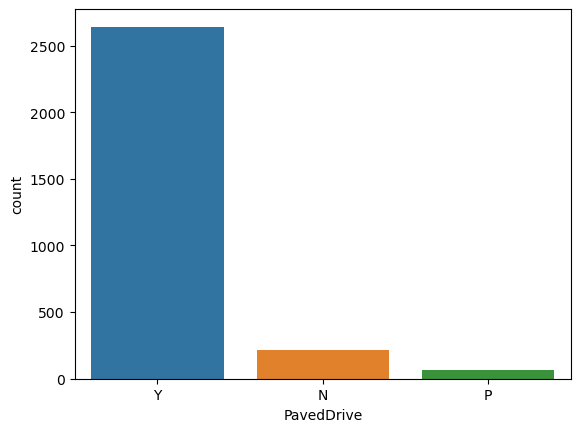

Categorical values: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Categorical ratio: PoolQC
Ex   0.001
Gd   0.001
Fa   0.001
Name: count, dtype: float64


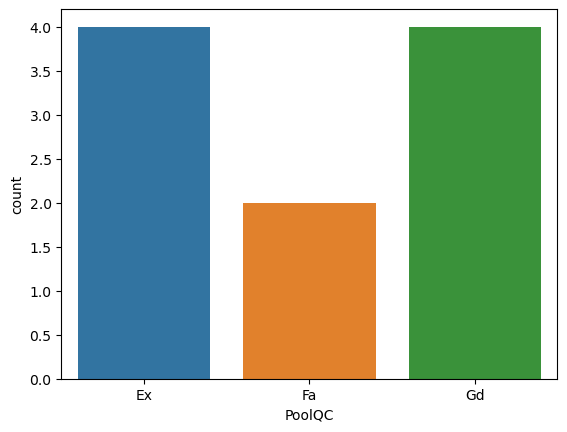

Categorical values: group
train    1460
test     1459
Name: count, dtype: int64
Categorical ratio: group
train   0.500
test    0.500
Name: count, dtype: float64


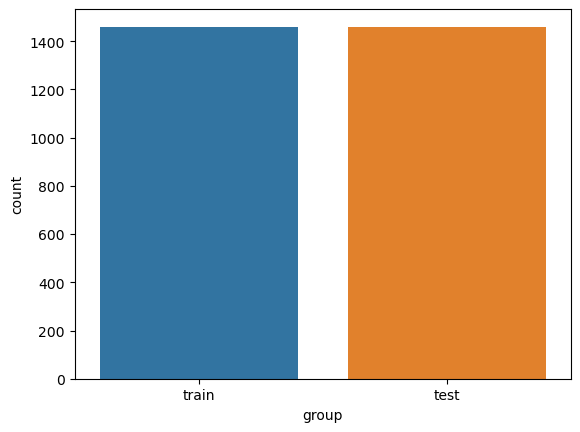

In [5]:
##Vemos cómo se distribuyen los datos de las 44 categóticas
def cat_summary(dataframe, col_names, plot=False):
    cat_values = dataframe[col_names].value_counts()
    cat_ratio = cat_values / len(dataframe[col_names])
    print(f"Categorical values: {cat_values}\nCategorical ratio: {cat_ratio}")
    if plot:
        sns.countplot(x=dataframe[col_names], data=dataframe)
        plt.show(block=False)


for col in total_Cat:
    cat_summary(df, col, plot=True)

Numerical describe: count   2919.000
mean      57.138
std       42.518
min       20.000
25%       20.000
50%       50.000
75%       70.000
max      190.000
Name: MSSubClass, dtype: float64


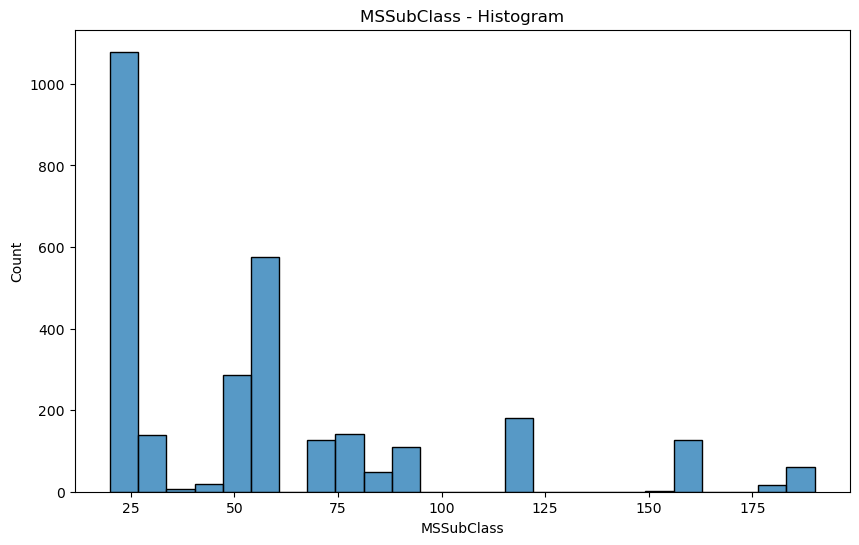

Numerical describe: count   2433.000
mean      69.306
std       23.345
min       21.000
25%       59.000
50%       68.000
75%       80.000
max      313.000
Name: LotFrontage, dtype: float64


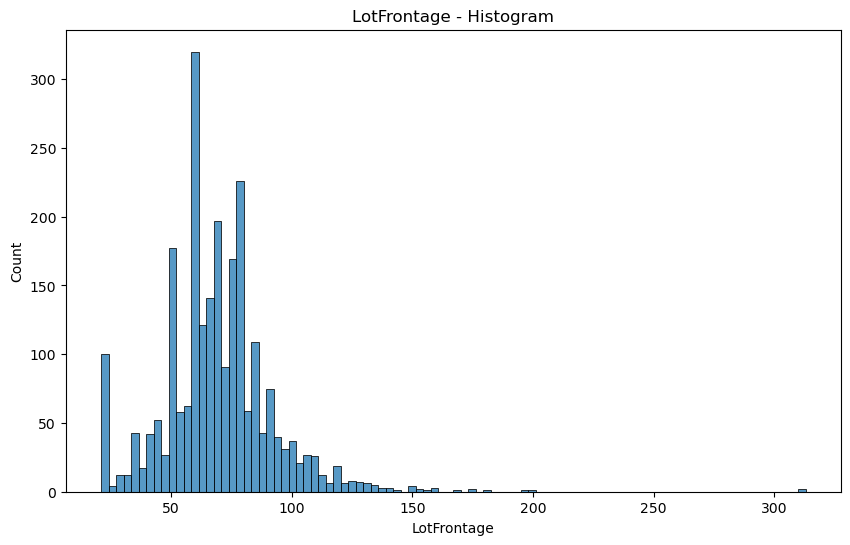

Numerical describe: count     2919.000
mean     10168.114
std       7886.996
min       1300.000
25%       7478.000
50%       9453.000
75%      11570.000
max     215245.000
Name: LotArea, dtype: float64


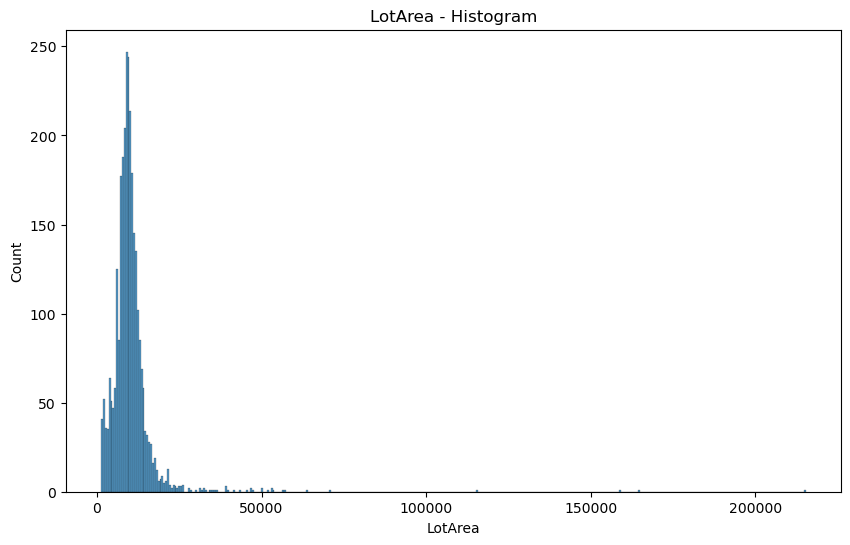

Numerical describe: count   2919.000
mean       6.089
std        1.410
min        1.000
25%        5.000
50%        6.000
75%        7.000
max       10.000
Name: OverallQual, dtype: float64


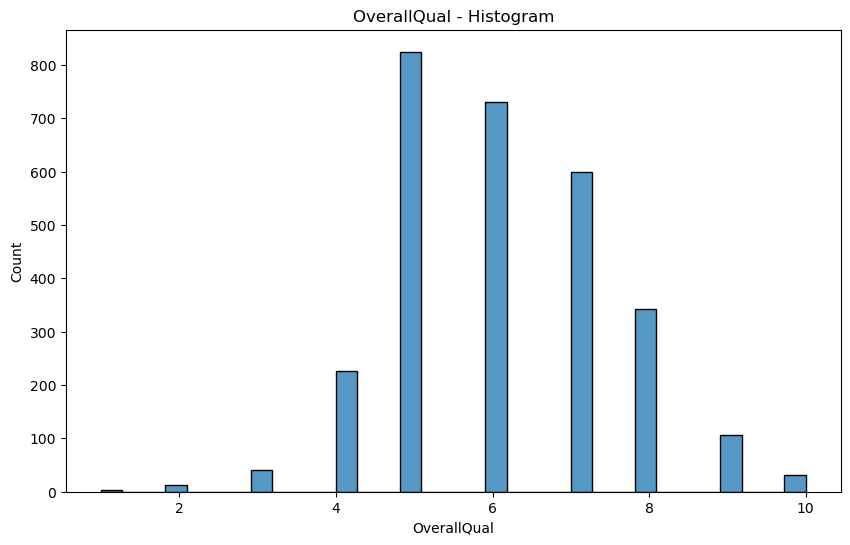

Numerical describe: count   2919.000
mean       5.565
std        1.113
min        1.000
25%        5.000
50%        5.000
75%        6.000
max        9.000
Name: OverallCond, dtype: float64


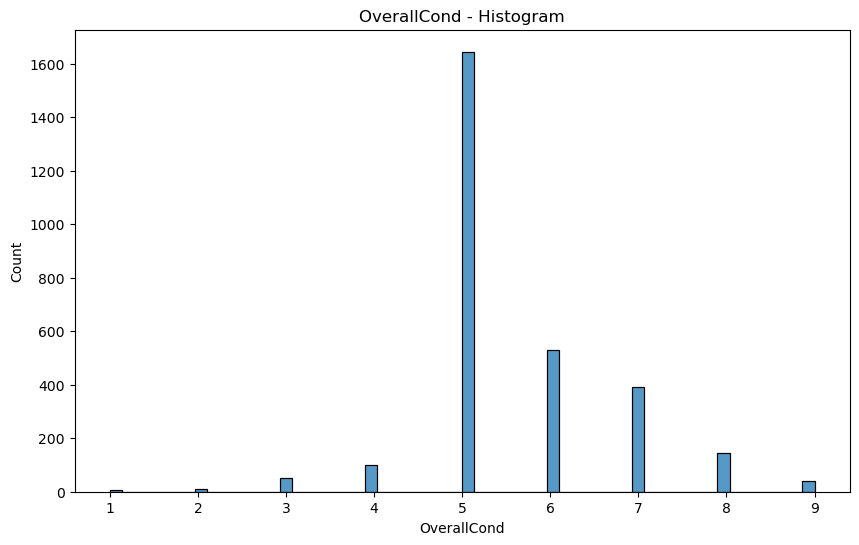

Numerical describe: count   2919.000
mean    1971.313
std       30.291
min     1872.000
25%     1953.500
50%     1973.000
75%     2001.000
max     2010.000
Name: YearBuilt, dtype: float64


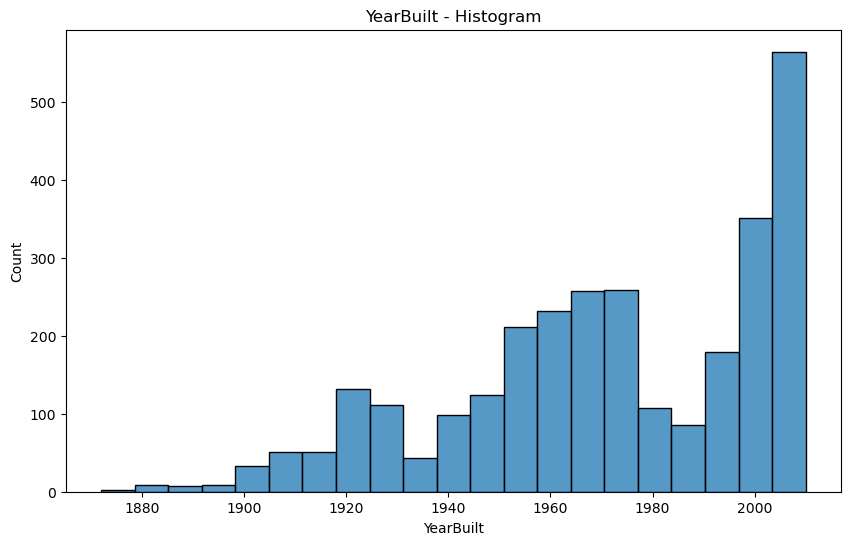

Numerical describe: count   2919.000
mean    1984.264
std       20.894
min     1950.000
25%     1965.000
50%     1993.000
75%     2004.000
max     2010.000
Name: YearRemodAdd, dtype: float64


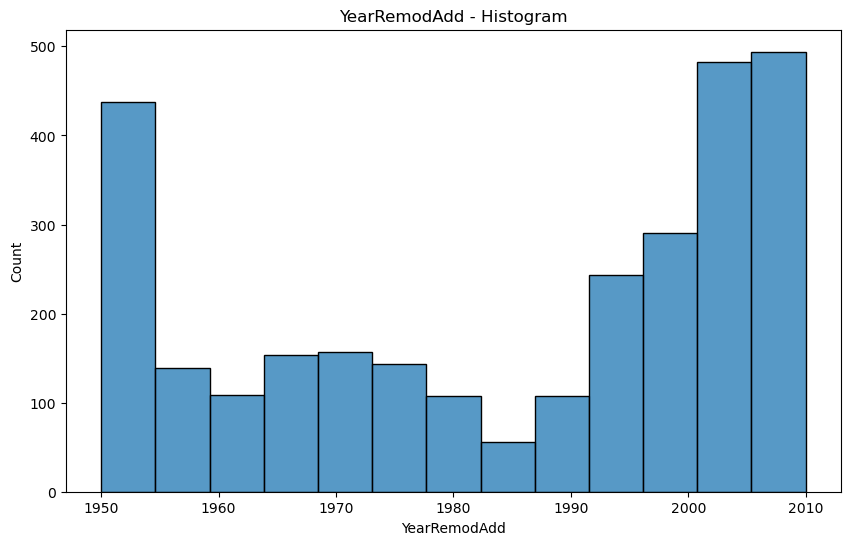

Numerical describe: count   2896.000
mean     102.201
std      179.334
min        0.000
25%        0.000
50%        0.000
75%      164.000
max     1600.000
Name: MasVnrArea, dtype: float64


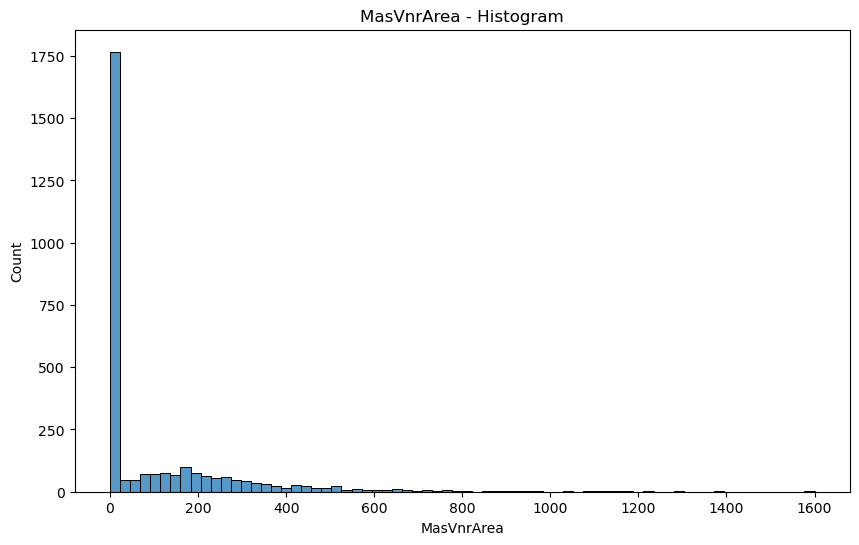

Numerical describe: count   2918.000
mean     441.423
std      455.611
min        0.000
25%        0.000
50%      368.500
75%      733.000
max     5644.000
Name: BsmtFinSF1, dtype: float64


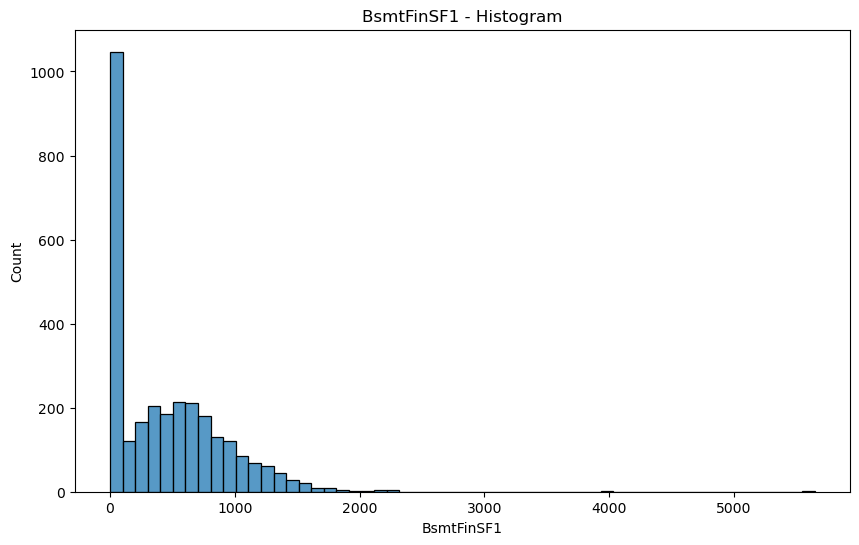

Numerical describe: count   2918.000
mean      49.582
std      169.206
min        0.000
25%        0.000
50%        0.000
75%        0.000
max     1526.000
Name: BsmtFinSF2, dtype: float64


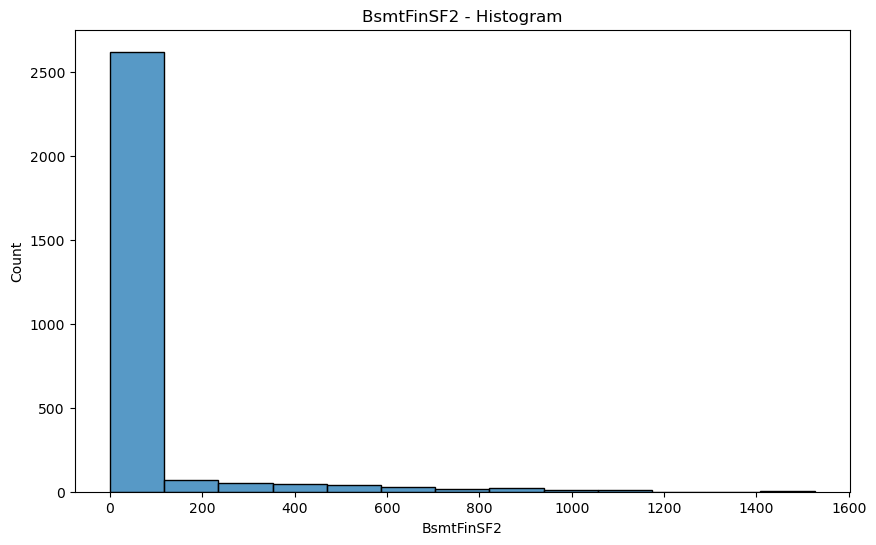

Numerical describe: count   2918.000
mean     560.772
std      439.544
min        0.000
25%      220.000
50%      467.000
75%      805.500
max     2336.000
Name: BsmtUnfSF, dtype: float64


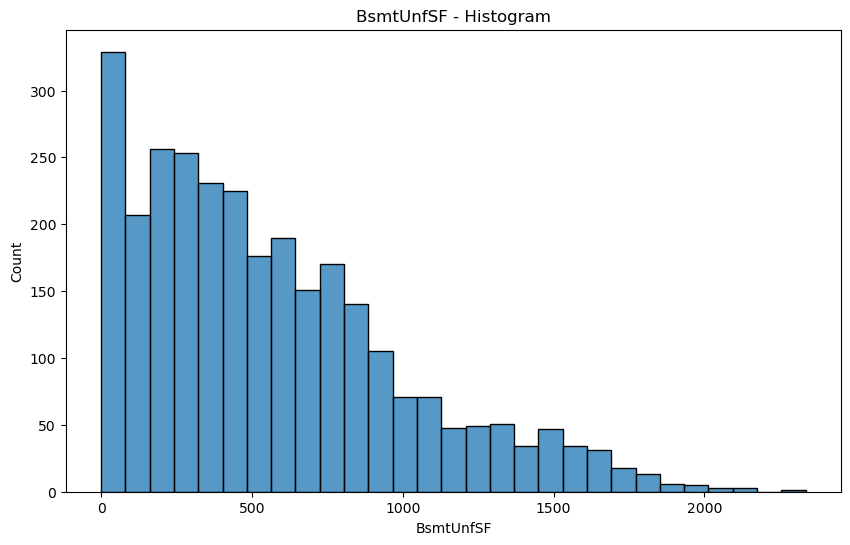

Numerical describe: count   2918.000
mean    1051.778
std      440.766
min        0.000
25%      793.000
50%      989.500
75%     1302.000
max     6110.000
Name: TotalBsmtSF, dtype: float64


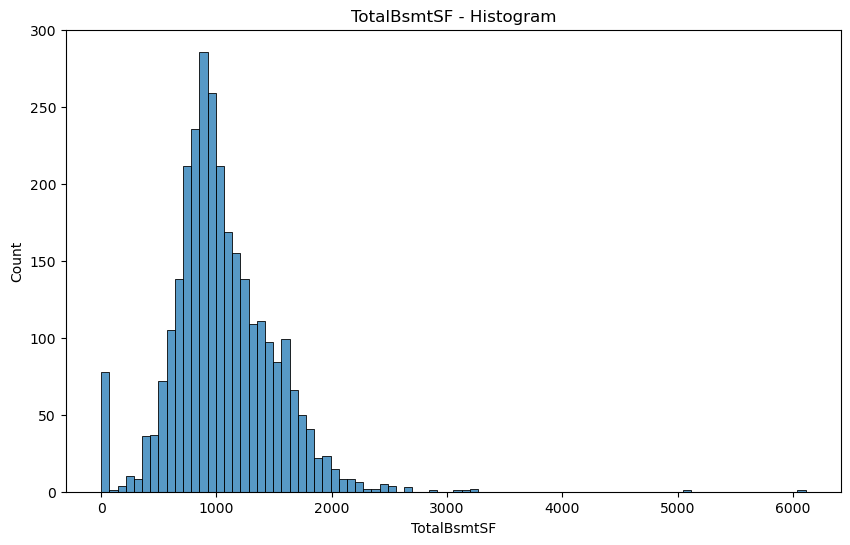

Numerical describe: count   2919.000
mean    1159.582
std      392.362
min      334.000
25%      876.000
50%     1082.000
75%     1387.500
max     5095.000
Name: 1stFlrSF, dtype: float64


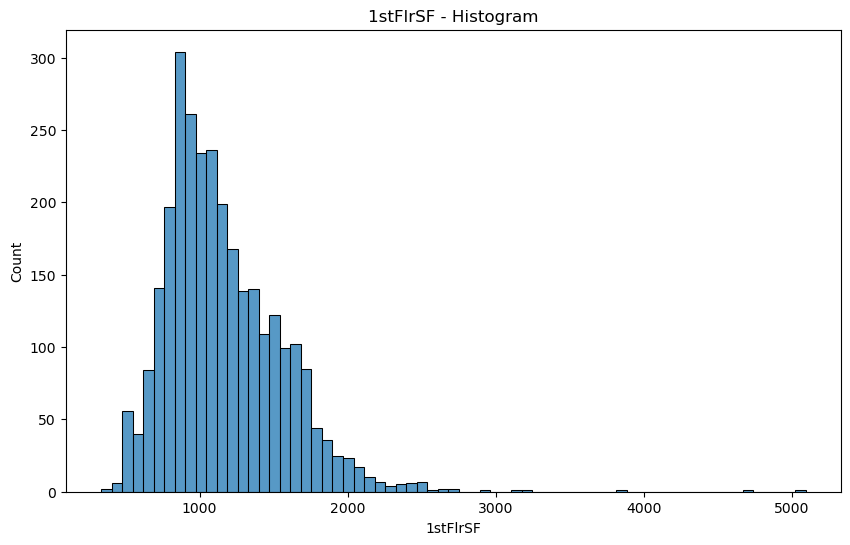

Numerical describe: count   2919.000
mean     336.484
std      428.701
min        0.000
25%        0.000
50%        0.000
75%      704.000
max     2065.000
Name: 2ndFlrSF, dtype: float64


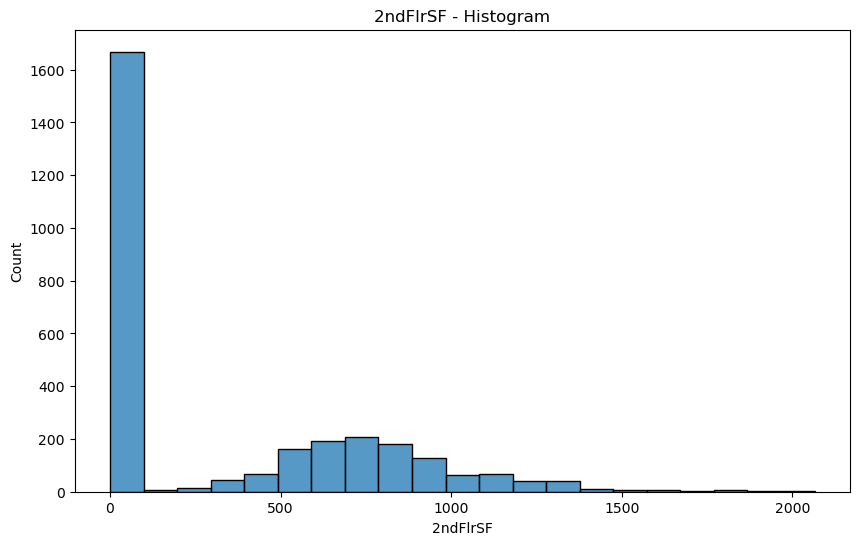

Numerical describe: count   2919.000
mean       4.694
std       46.397
min        0.000
25%        0.000
50%        0.000
75%        0.000
max     1064.000
Name: LowQualFinSF, dtype: float64


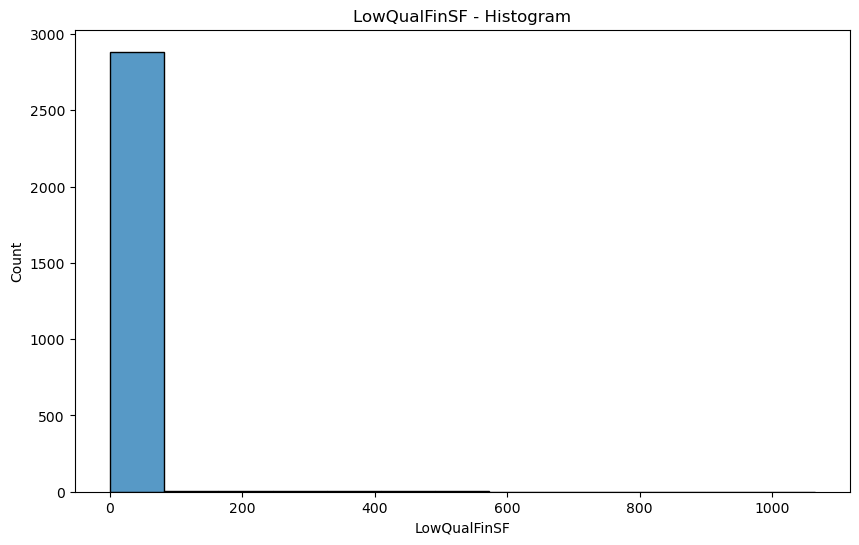

Numerical describe: count   2919.000
mean    1500.760
std      506.051
min      334.000
25%     1126.000
50%     1444.000
75%     1743.500
max     5642.000
Name: GrLivArea, dtype: float64


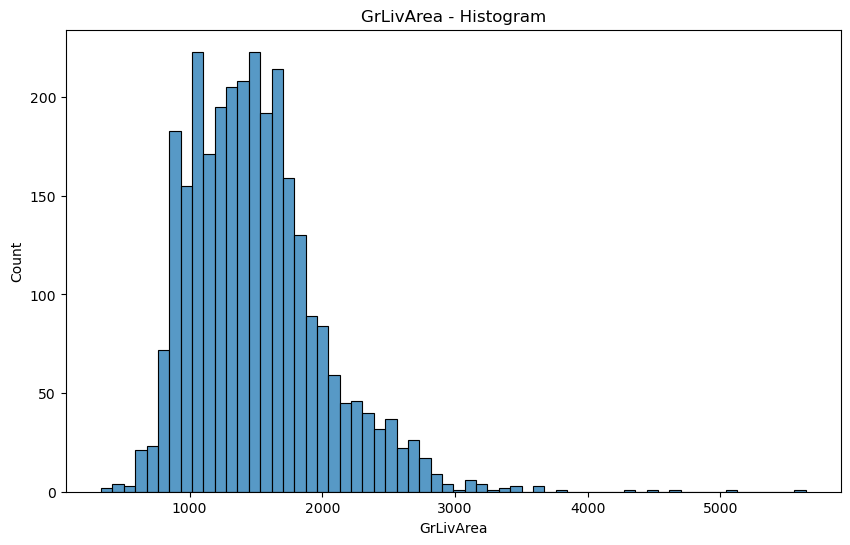

Numerical describe: count   2917.000
mean       0.430
std        0.525
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        3.000
Name: BsmtFullBath, dtype: float64


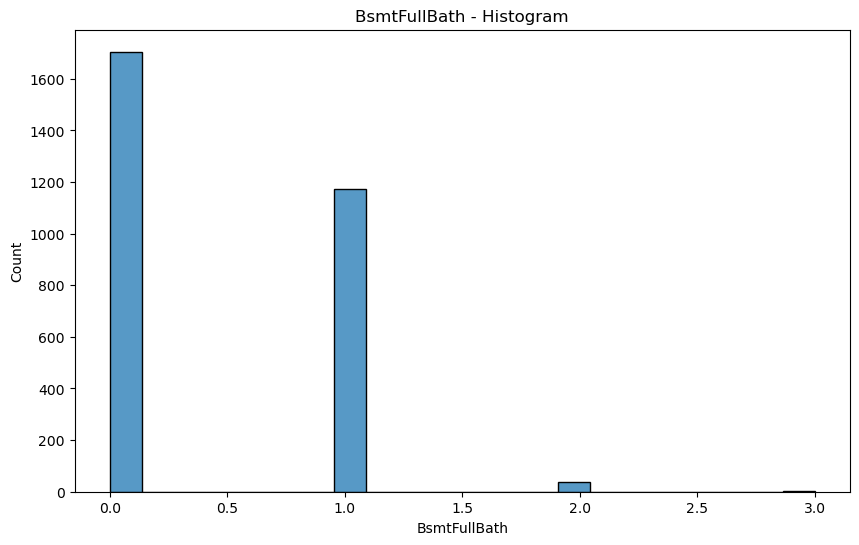

Numerical describe: count   2917.000
mean       0.061
std        0.246
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        2.000
Name: BsmtHalfBath, dtype: float64


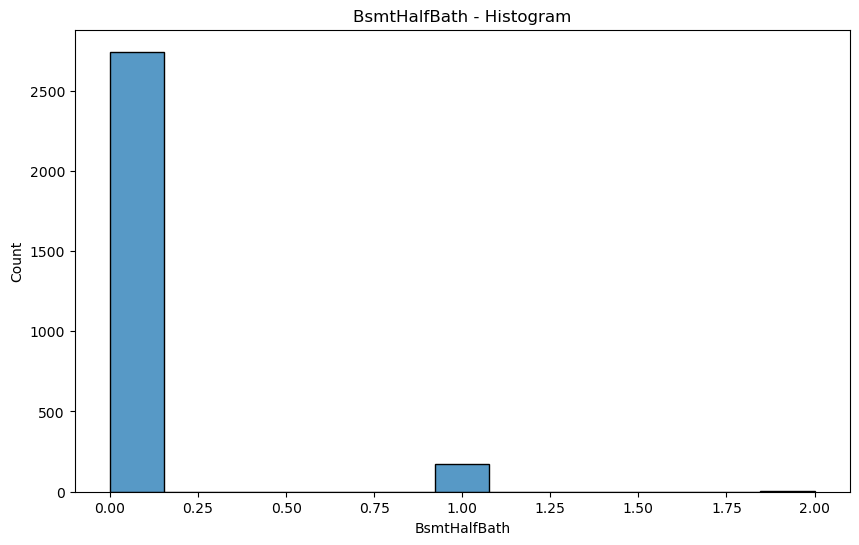

Numerical describe: count   2919.000
mean       1.568
std        0.553
min        0.000
25%        1.000
50%        2.000
75%        2.000
max        4.000
Name: FullBath, dtype: float64


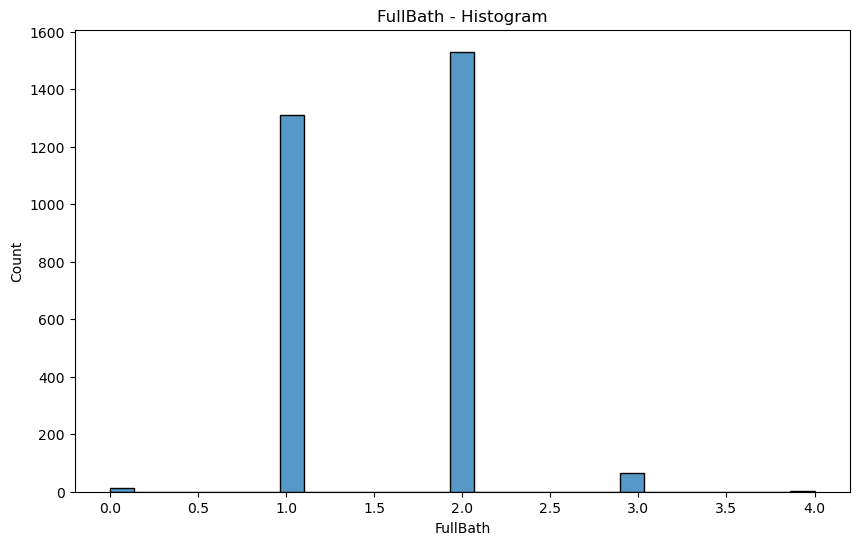

Numerical describe: count   2919.000
mean       0.380
std        0.503
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        2.000
Name: HalfBath, dtype: float64


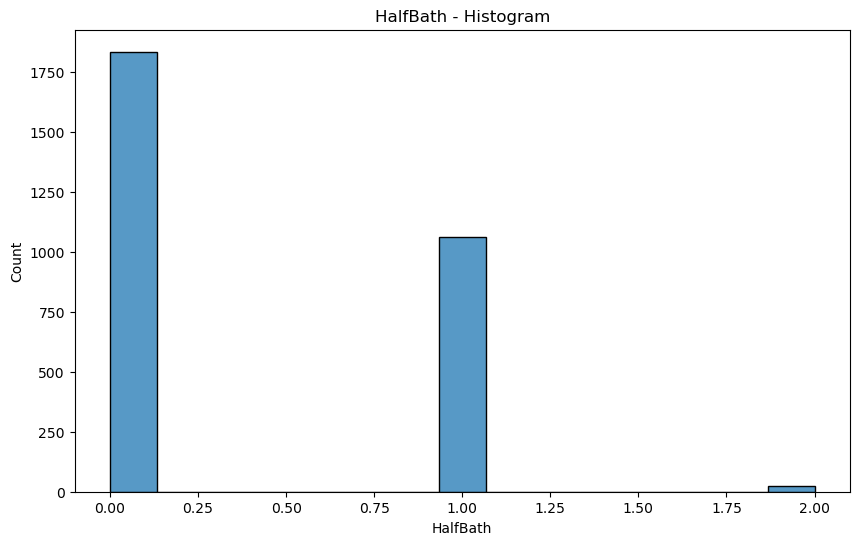

Numerical describe: count   2919.000
mean       2.860
std        0.823
min        0.000
25%        2.000
50%        3.000
75%        3.000
max        8.000
Name: BedroomAbvGr, dtype: float64


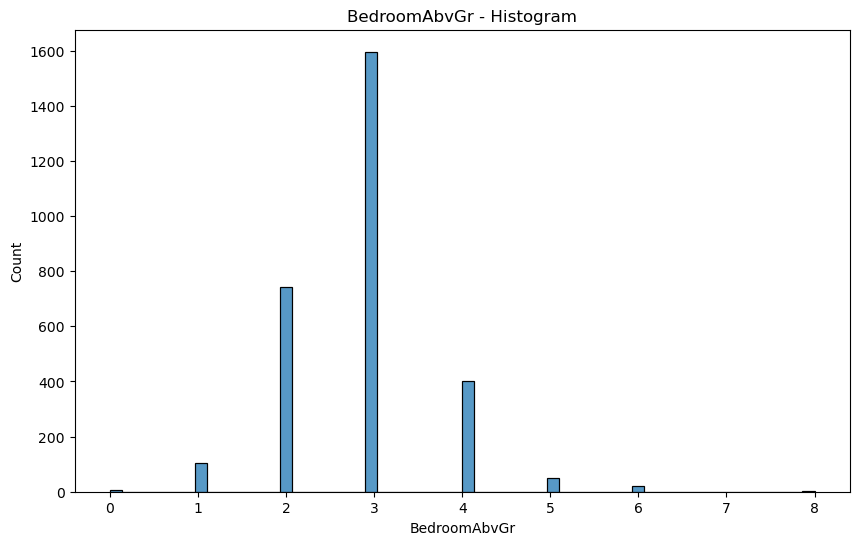

Numerical describe: count   2919.000
mean       1.045
std        0.214
min        0.000
25%        1.000
50%        1.000
75%        1.000
max        3.000
Name: KitchenAbvGr, dtype: float64


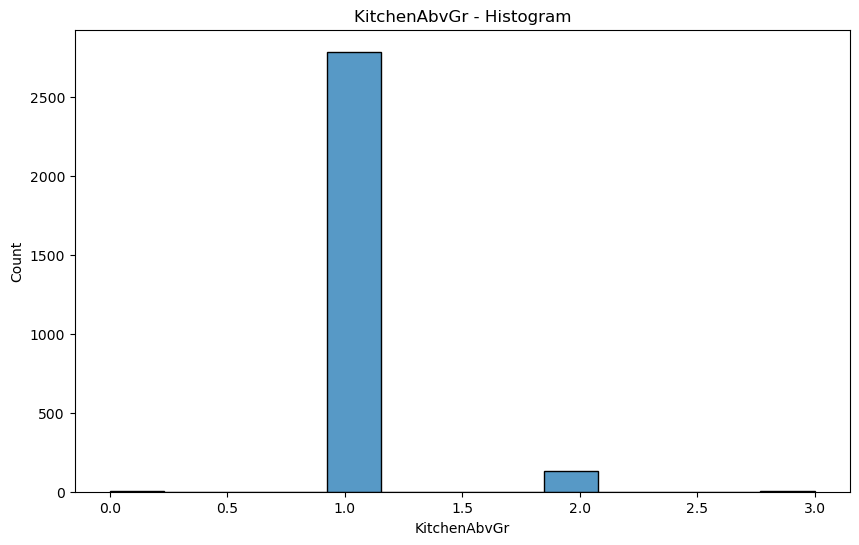

Numerical describe: count   2919.000
mean       6.452
std        1.569
min        2.000
25%        5.000
50%        6.000
75%        7.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


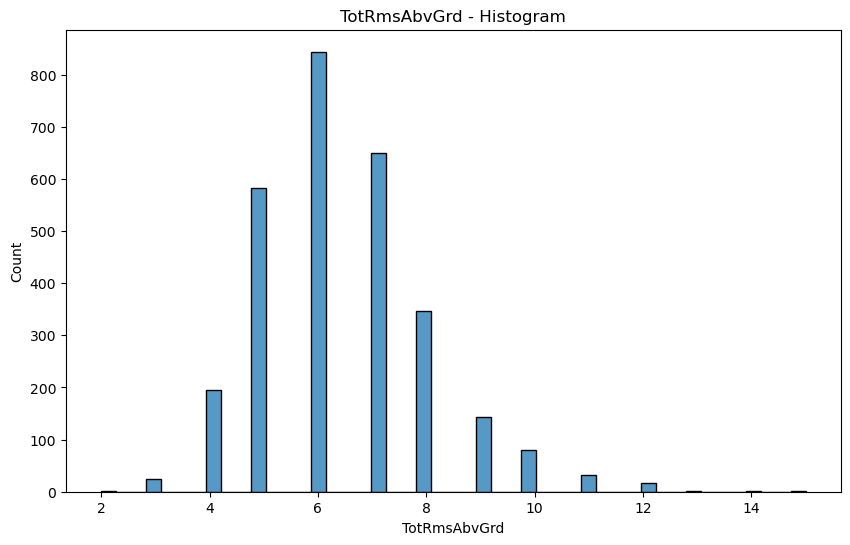

Numerical describe: count   2919.000
mean       0.597
std        0.646
min        0.000
25%        0.000
50%        1.000
75%        1.000
max        4.000
Name: Fireplaces, dtype: float64


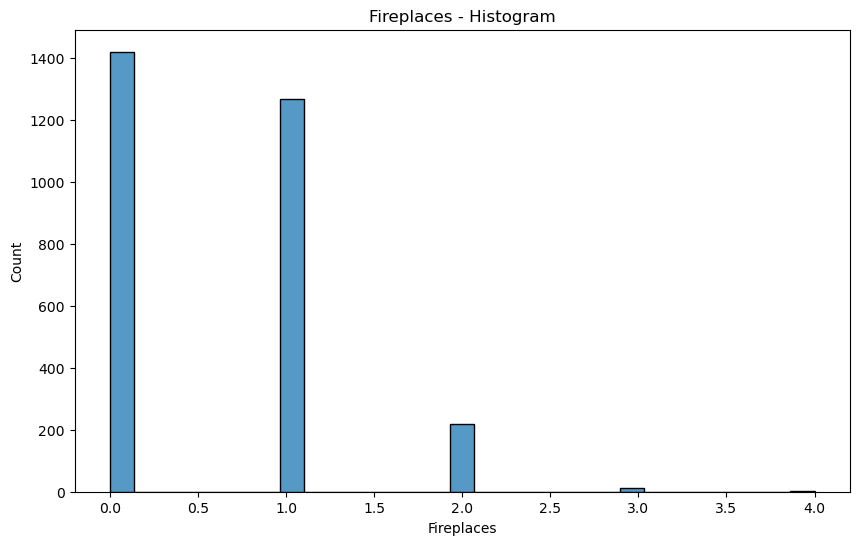

Numerical describe: count   2760.000
mean    1978.113
std       25.574
min     1895.000
25%     1960.000
50%     1979.000
75%     2002.000
max     2207.000
Name: GarageYrBlt, dtype: float64


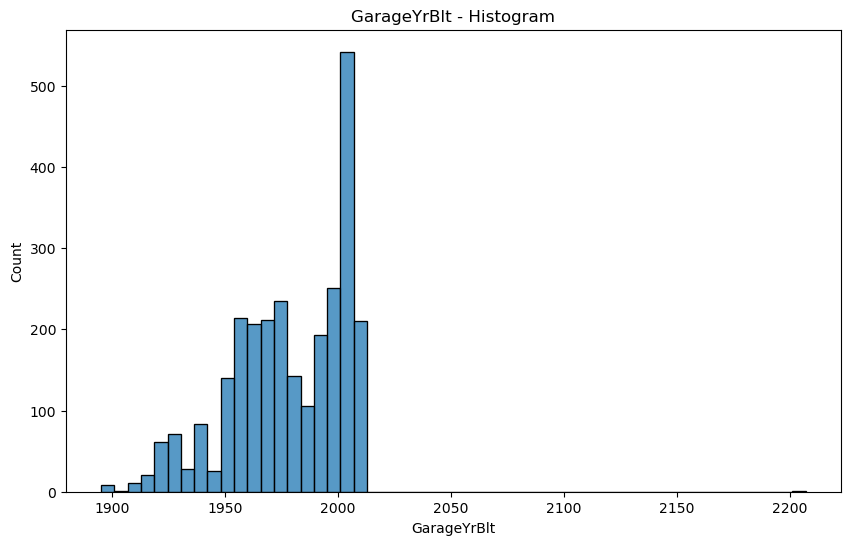

Numerical describe: count   2918.000
mean       1.767
std        0.762
min        0.000
25%        1.000
50%        2.000
75%        2.000
max        5.000
Name: GarageCars, dtype: float64


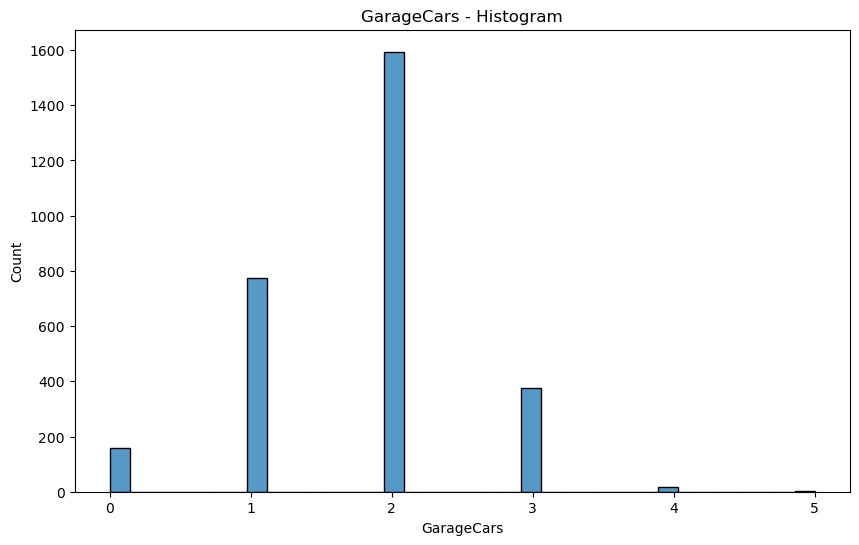

Numerical describe: count   2918.000
mean     472.875
std      215.395
min        0.000
25%      320.000
50%      480.000
75%      576.000
max     1488.000
Name: GarageArea, dtype: float64


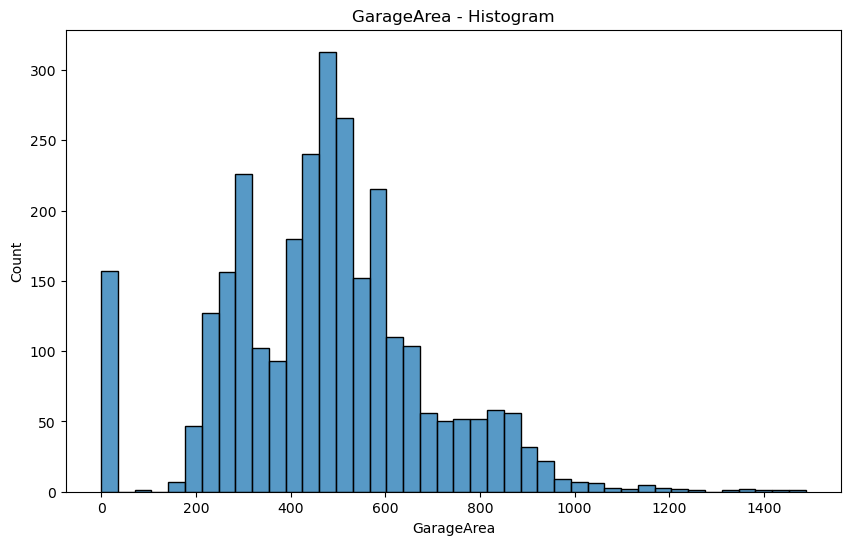

Numerical describe: count   2919.000
mean      93.710
std      126.527
min        0.000
25%        0.000
50%        0.000
75%      168.000
max     1424.000
Name: WoodDeckSF, dtype: float64


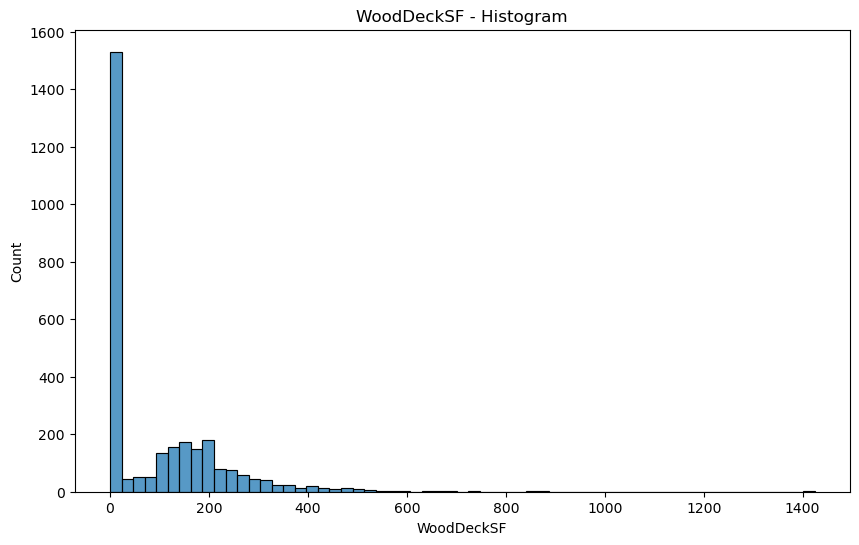

Numerical describe: count   2919.000
mean      47.487
std       67.575
min        0.000
25%        0.000
50%       26.000
75%       70.000
max      742.000
Name: OpenPorchSF, dtype: float64


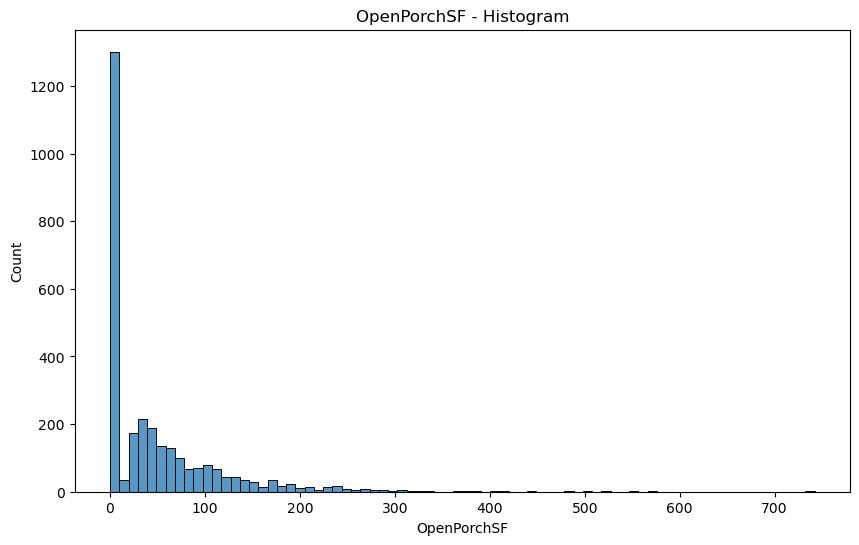

Numerical describe: count   2919.000
mean      23.098
std       64.244
min        0.000
25%        0.000
50%        0.000
75%        0.000
max     1012.000
Name: EnclosedPorch, dtype: float64


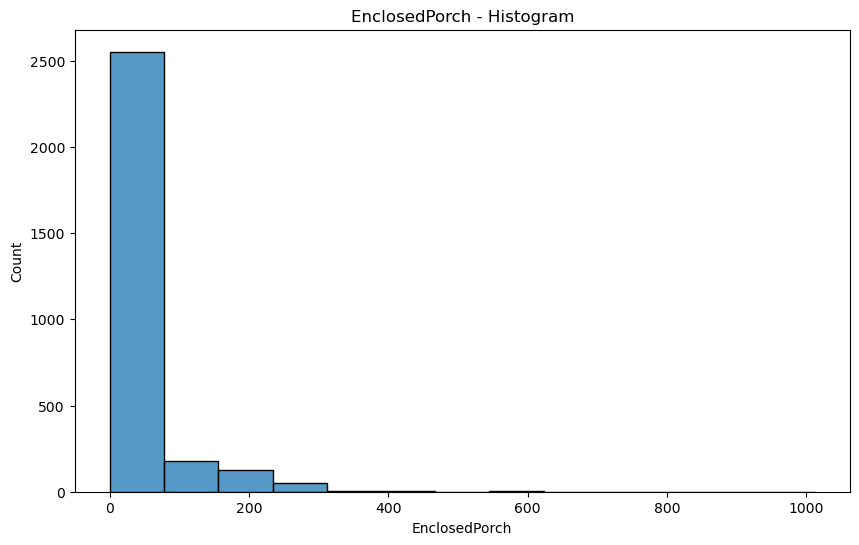

Numerical describe: count   2919.000
mean       2.602
std       25.188
min        0.000
25%        0.000
50%        0.000
75%        0.000
max      508.000
Name: 3SsnPorch, dtype: float64


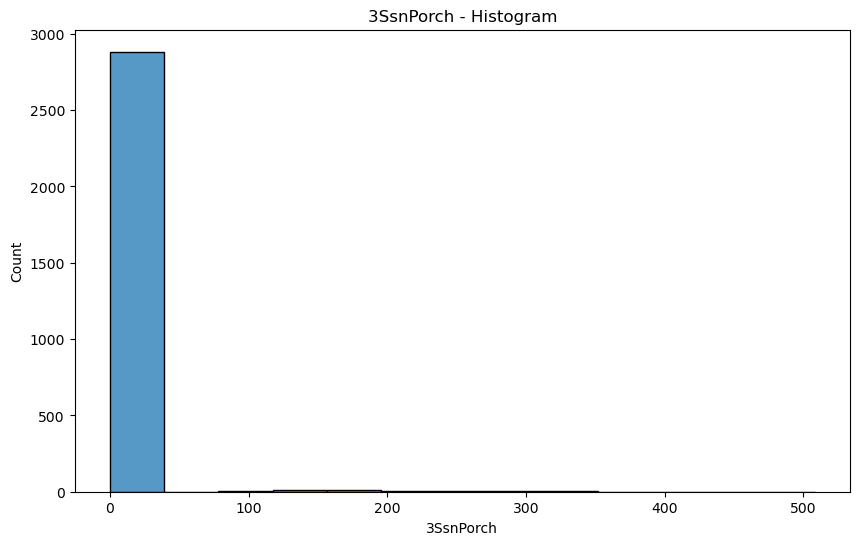

Numerical describe: count   2919.000
mean      16.062
std       56.184
min        0.000
25%        0.000
50%        0.000
75%        0.000
max      576.000
Name: ScreenPorch, dtype: float64


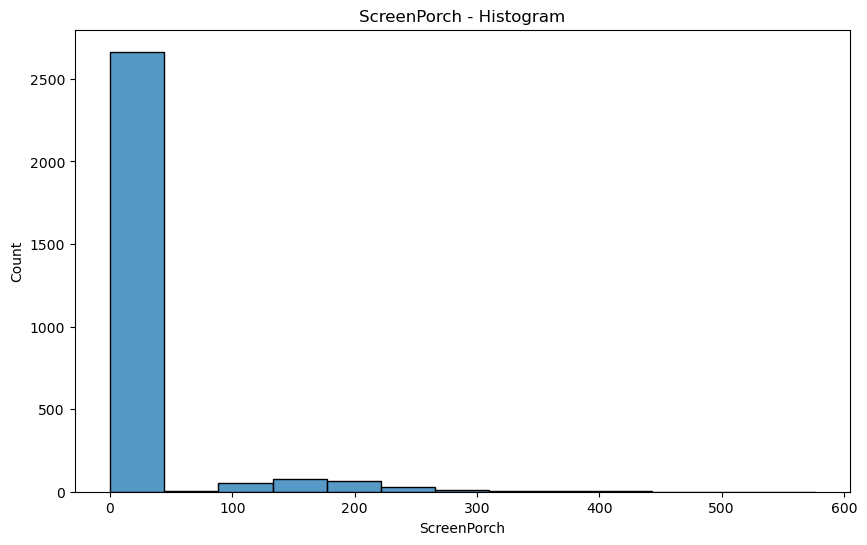

Numerical describe: count   2919.000
mean       2.252
std       35.664
min        0.000
25%        0.000
50%        0.000
75%        0.000
max      800.000
Name: PoolArea, dtype: float64


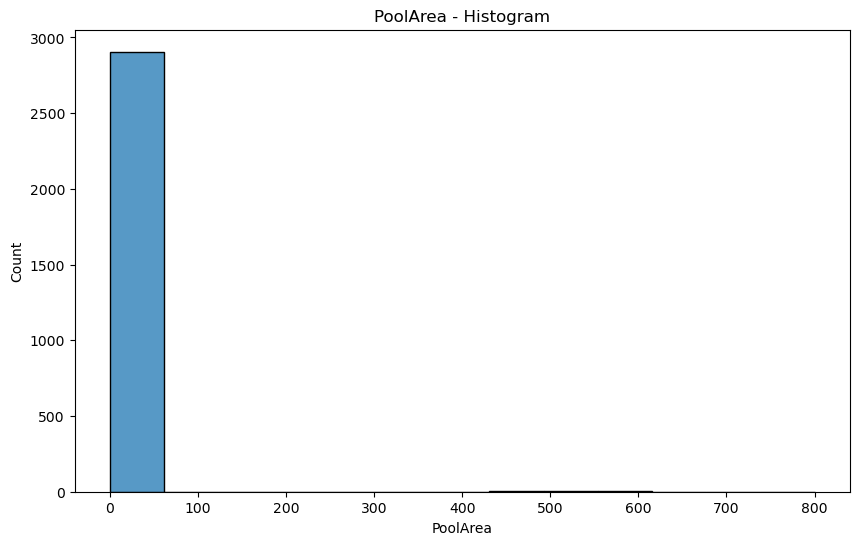

Numerical describe: count    2919.000
mean       50.826
std       567.402
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     17000.000
Name: MiscVal, dtype: float64


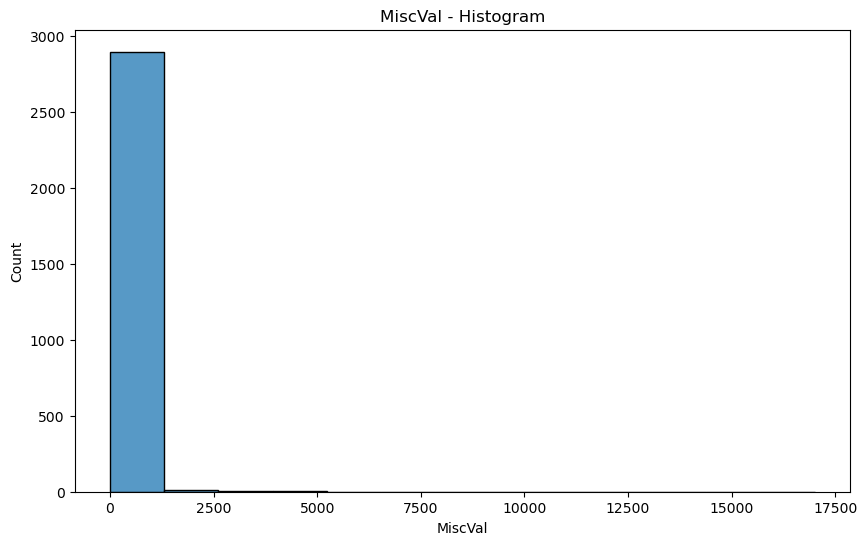

Numerical describe: count   2919.000
mean       6.213
std        2.715
min        1.000
25%        4.000
50%        6.000
75%        8.000
max       12.000
Name: MoSold, dtype: float64


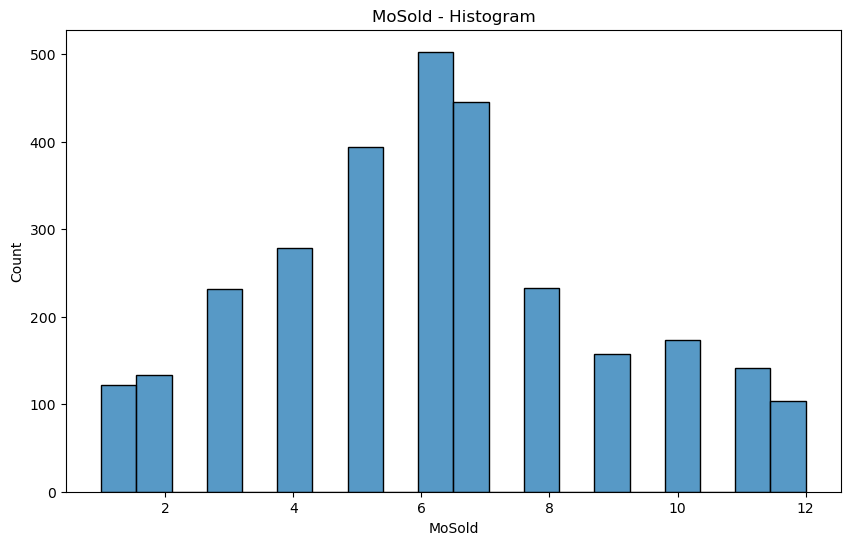

Numerical describe: count   2919.000
mean    2007.793
std        1.315
min     2006.000
25%     2007.000
50%     2008.000
75%     2009.000
max     2010.000
Name: YrSold, dtype: float64


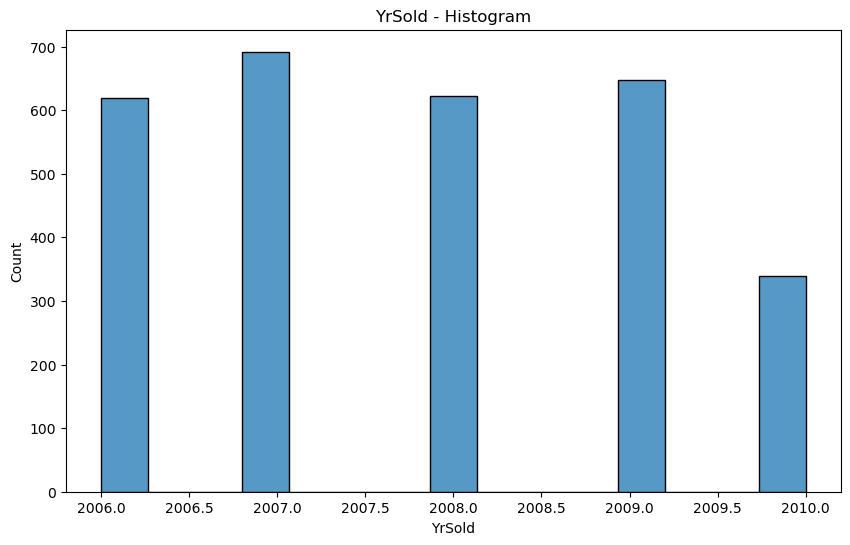

In [6]:
##Ahora vemos las distribuciones de las 36 variables numéricas
def num_summary(dataframe, col_names, plot=False):
    num_values = dataframe[col_names].describe().T
    print(f"Numerical describe: {num_values}")
    if plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=dataframe[col_names], data=dataframe)
        plt.title(f"{col_names} - Histogram")
        plt.show(block=False)


for col in numerical_col:
    num_summary(df, col, plot=True)